# Loading Libraries

In [6]:
# Necessary Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler,power_transform,PowerTransformer
from sklearn.decomposition import PCA
from scipy.stats import skew
from sklearn.cluster import KMeans

# Function to return the statistical metrics

In [7]:
def stats_metrics_var(df,variable,decimals=2):
        df_variable= df[variable]
        stats = df_variable.describe()
        stats.loc['var'] = df_variable.var().tolist()
        stats.loc['skew'] = df_variable.skew().tolist()
        return stats.round(decimals)

# 3. Set colors for the graphics

In [8]:
dict_color={'america':'#c72b00','europe':'#00399c','africa':'#a39300',
            'asia':'#2b9100','oceania':'#4a0087','fsu':'#9c0091'}

values = list(dict_color.values())


values[0]=dict_color['africa']
values[1]=dict_color['america']

values[2]=dict_color['asia']
values[3]=dict_color['europe']

values[4]=dict_color['fsu']
values[5]=dict_color['oceania']

values_1 = values

values_2 = [dict_color['africa'],dict_color['america'],dict_color['asia'],
            dict_color['europe'],dict_color['oceania']]

color_1 = ['#bfbfbf','#fc0303','#F4C430',dict_color['asia']]
color_2 = ['#bfbfbf',dict_color['europe'],dict_color['africa']]

In [9]:
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

# Loading Data

In [13]:
df = pd.read_csv('C:/Users/Jesús García/Documents/CREAR PORTAFOLIO RAFA/GITHUB/proyecto-portafolio/DATOS/gapminder_full.csv')

In [14]:
stats_metrics_var(df,['life_exp','population','gdp_cap'],2)

,life_exp,population,gdp_cap
count,1704.00,1.704000e+03,1704.00
mean,59.47,2.960121e+07,7215.33
std,12.92,1.061579e+08,9857.45
min,23.60,6.001100e+04,241.17
25%,48.20,2.793664e+06,1202.06
50%,60.71,7.023596e+06,3531.85
75%,70.85,1.958522e+07,9325.46
max,82.60,1.318683e+09,113523.13
var,166.85,1.126950e+16,97169410.06
skew,-0.25,8.340000e+00,3.85


# Number of observations:

* In the filtered dataset there are **1704** observations.

## Info: 

|Variable|Type|
|--- | --- |
|Country Name|Categorical|
|Information Year| Categorical|
|Continent of the Country| Categorical|
|Life Expectation| Quantitative|
|Population| Quantitative|
|GDP Percapita| Quantitative|

* Number of countries in the dataset: **142**

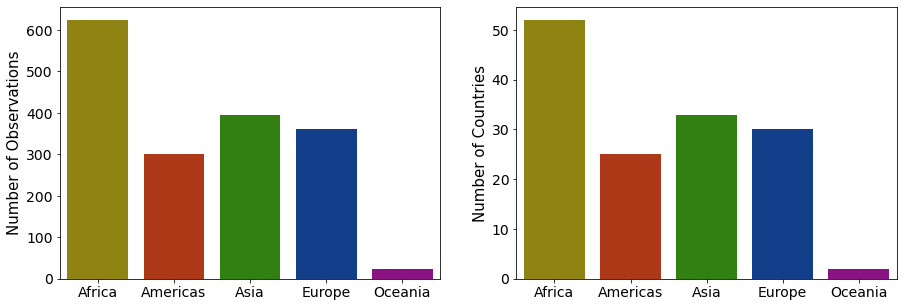

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
continent_series=df.groupby(by='continent').size()
sns.barplot(x=continent_series.index,y=continent_series.values,palette=values[0:5])
plt.ylabel('Number of Observations',size=15)
plt.xlabel('')

plt.subplot(1,2,2)
df_unique=df.drop_duplicates(subset='country')
continent_series=df_unique.groupby(by='continent').size()
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
sns.barplot(x=continent_series.index,y=continent_series.values,palette=values[0:5])
plt.ylabel('Number of Countries',size=15)
plt.xlabel('')

plt.savefig('obsv_per_continent_2.pdf',bbox_inches='tight')
plt.show()

## Univariate Analysis

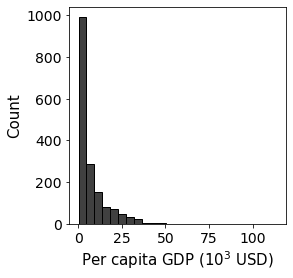

In [16]:
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
x=sns.histplot(df['gdp_cap']/10**3,color='#000000',bins=25)
plt.xlabel('Per capita GDP ($10^3$ USD)',size=15)
plt.ylabel('Count',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))

plt.savefig('hist_gdp_2.pdf',bbox_inches='tight')
plt.show()

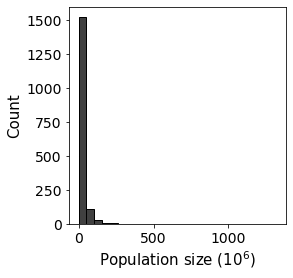

In [17]:
x=sns.histplot(df['population']/10**6,color='#000000',bins=25)
plt.xlabel('Population size ($10^6$)',size=15)
plt.ylabel('Count',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))

plt.savefig('hist_pop_2.pdf',bbox_inches='tight')
plt.show()

In [18]:
df['log_pop'] = np.log10(df['population'])
df['log_gdp'] = np.log10(df['gdp_cap'])

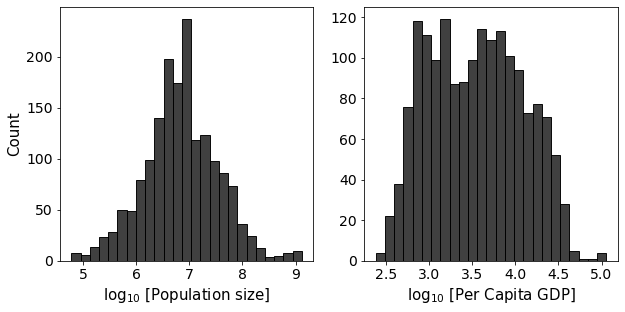

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
x=sns.histplot(df['log_pop'],color='#000000',bins=25)
plt.xlabel('$\log_{10}$ [Population size]',size=15)
plt.ylabel('Count',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))

plt.subplot(1,2,2)

x=sns.histplot(df['log_gdp'],color='#000000',bins=25)
plt.xlabel('$\log_{10}$ [Per Capita GDP]',size=15)
plt.ylabel('',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.savefig('hist_pop_gdp_log_2.pdf',bbox_inches='tight')

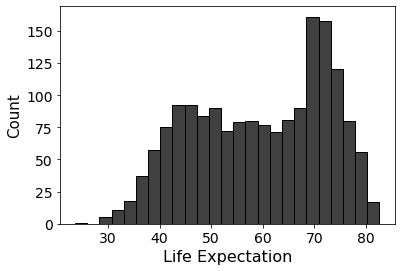

In [20]:
x=sns.histplot(df['life_exp'],color='#000000',bins=25)
plt.xlabel('Life Expectation',size=16)
plt.ylabel('Count',size=15)
plt.savefig('hist_lexp_lexp.pdf',bbox_inches='tight')

## Data Per Year

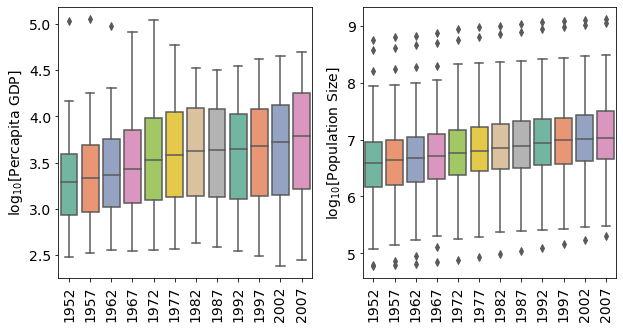

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

sns.boxplot(data=df,y=np.log10(df['gdp_cap']),x='year',palette='Set2')
plt.xticks(rotation=90)
plt.ylabel('$\log_{10}$[Percapita GDP]',size=14)
plt.xlabel('')


plt.subplot(1,2,2)

sns.boxplot(data=df,y=np.log10(df['population']),x='year',palette='Set2')
plt.xticks(rotation=90)
plt.ylabel('$\log_{10}$[Population Size]',size=14)
plt.xlabel('')
plt.savefig('box_plot_gdp_pop.pdf',bbox_inches='tight')
plt.show()

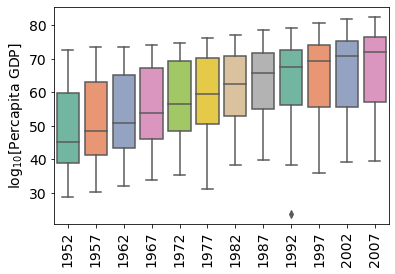

In [22]:
sns.boxplot(data=df,x='year',y='life_exp',palette='Set2')
plt.xticks(rotation=90)
plt.ylabel('$\log_{10}$[Percapita GDP]',size=14)
plt.xlabel('')
plt.savefig('box_plot_lexp.pdf',bbox_inches='tight')
plt.show()

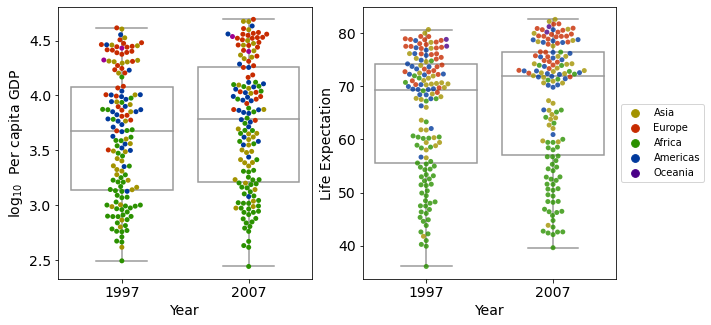

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=df.query('year==1997 or year==2007'),
            y=np.log10(df.query('year==1997 or year==2007')['gdp_cap'].values),x='year',color='white',showfliers = False)
g_1 = sns.swarmplot(x="year", y=np.log10(df.query('year==1997 or year==2007')['gdp_cap'].values), 
                   data=df.query('year==1997 or year==2007'), hue='continent',palette=values[0:5])
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Year',size=14)
plt.ylabel('$\log_{10}$  Per capita GDP',size=14)
plt.legend('')

plt.subplot(1,2,2)
sns.boxplot(data=df.query('year==2007 or year==1997'),y='life_exp',x='year',color='white')
ax = sns.swarmplot(x="year", y='life_exp', 
                   data=df.query('year==2007 or year==1997'),s=5, 
                   hue='continent',palette=values_2,alpha=0.8)

plt.xlabel('Year',size=14)

g_1.get_legend().remove()

plt.ylabel('Life Expectation',size=14)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5),title_fontsize='15')
plt.savefig('box_plot_year_pop.pdf',bbox_inches='tight')

## Exploratory Analysis In The Continent

In [30]:
df_americas=df.loc[df['continent']=='Americas']
df_africa=df.loc[df['continent']=='Africa']
df_asia=df.loc[df['continent']=='Asia']
df_europe=df.loc[df['continent']=='Europe']
df_oceania=df.loc[df['continent']=='Oceania']
df_fsu=df.loc[df['continent']=='FSU']

No handles with labels found to put in legend.


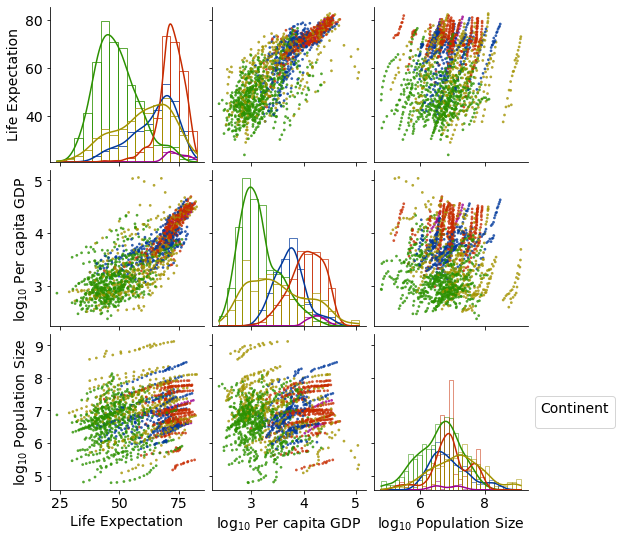

In [31]:
g=sns.pairplot(df[['life_exp','log_gdp','log_pop','continent']],hue='continent',
               diag_kind="hist",diag_kws=dict(fill=False,kde=True),palette=values[0:5],
               markers='.',plot_kws={'s':30,'edgecolor':'none','alpha':0.8})
g._legend.remove()
g.axes[2,0].set_xlabel('Life Expectation',size=14)
g.axes[0,0].set_ylabel('Life Expectation',size=14)
g.axes[2,1].set_xlabel('$\log_{10}$ Per capita GDP ',size=14)
g.axes[1,0].set_ylabel('$\log_{10}$ Per capita GDP ',size=14)
g.axes[2,2].set_xlabel('$\log_{10}$ Population Size',size=14)
g.axes[2,0].set_ylabel('$\log_{10}$ Population Size',size=14)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize='14', title_fontsize='14',title='Continent')


plt.savefig('pair_plot_variables_2.pdf',bbox_inches='tight')

plt.show()

## Bivariate Analysis

In [32]:
df_aux=df.query('year==2007 or year==1997')
df_aux_2=df_aux.rename(columns={"population": "PS (in Billions)",'continent':'Continent'})

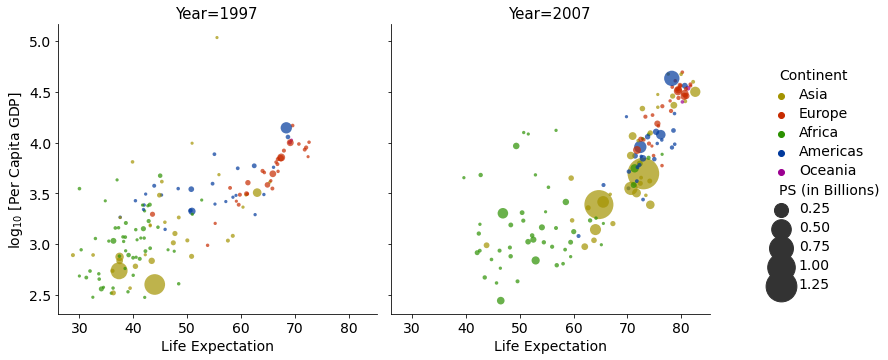

In [34]:
g=sns.relplot(data=df_aux_2,
              y='log_gdp',
              x='life_exp',col='year',hue='Continent',linewidth=0,
              size='PS (in Billions)',sizes=(10,1000),alpha=0.7,palette=values[0:5])
new_title = 'My title'
g._legend.get_texts()[0]=(0,0, 'Continent')
g._legend.get_texts()[6]=(0,0,'Population Size (M)')
plt.setp(g._legend.get_texts(), fontsize=14)
#plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

#x0,x1 = x.get_xlim()
#y0,y1 = x.get_ylim()
#x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,2))

plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
g.set_axis_labels('Life Expectation','$\log_{10}$ [Per Capita GDP]',size=14)
for ax, title in zip(g.axes.flat, ['Year=1997', 'Year=2007']):
    ax.set_title(title,size=15)
leg = g._legend
leg.set_bbox_to_anchor([1.1,0.5])
    
plt.savefig('scatter_percap_lexp_2007.pdf',bbox_inches='tight')

In [ ]:
correlation_matrix = df[['life_exp','population','gdp_cap']].corr()
sns.heatmap(correlation_matrix,square=True,cmap='coolwarm',annot=True,xticklabels=['LE','PS','GDP$_{per cap}$'],
            yticklabels=['LE','PS','GDP$_{per cap}$'],annot_kws={"size": 14})
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.savefig('correlation_matrix_2.pdf',bbox_inches='tight')
plt.show()    

## Applying PCA

In [35]:
scaled_data=power_transform(df[['life_exp','gdp_cap','population']].values,method='box-cox')

In [36]:
scaled_data = StandardScaler().fit_transform(scaled_data)

In [37]:
pca=PCA(n_components=3)
pca_values=pca.fit_transform(scaled_data)

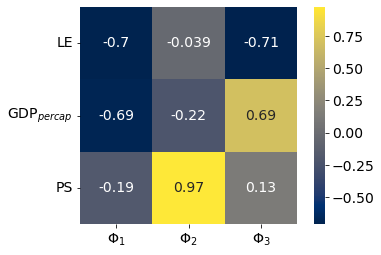

In [38]:
sns.heatmap(pca.components_.T,cmap='cividis',square='True',annot=True,
            xticklabels=['$\Phi_1$','$\Phi_2$','$\Phi_3$'],
            yticklabels=['LE','GDP$_{per cap}$','PS',],annot_kws={"size": 14})
plt.yticks(rotation=0)
plt.savefig('pca_heatmap.pdf',bbox_inches='tight')
plt.show()

In [39]:
y_value=pca.explained_variance_ratio_

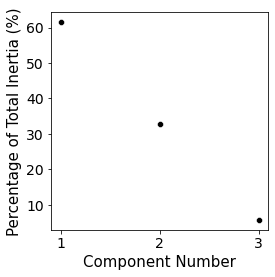

In [40]:
x=sns.scatterplot(x=np.arange(1,4,1),y=y_value*100,color='k')
plt.xticks(np.arange(1,4,1))
plt.xlabel('Component Number',size=15)
plt.ylabel('Percentage of Total Inertia (%)',size=15)
x0,x1 = x.get_xlim()
y0,y1 = x.get_ylim()
x.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.savefig('variance_2.pdf',bbox_inches='tight')
plt.show()

In [41]:
df_pca =pd.DataFrame({'pca_1':pca_values[:,0],'pca_2':pca_values[:,1],
                      'continent':df['continent'],'year':df['year']})

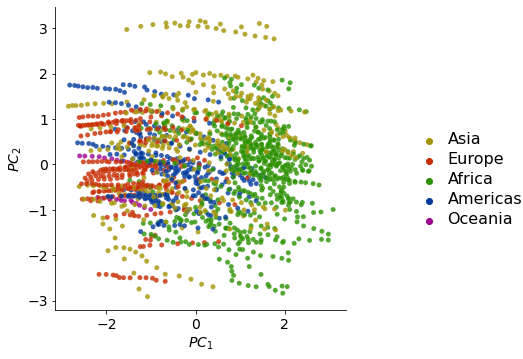

In [42]:
g=sns.relplot(data=df_pca,x='pca_1',y='pca_2',hue='continent',
              palette=values[0:5],linewidth=0.1,
              alpha=0.8,marker='.',s=100)

new_title = ''
g._legend.set_title(new_title)
# replace labels
plt.setp(g._legend.get_texts(), fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
g.set_axis_labels('$PC_1$','$PC_2$',size=14)

leg = g._legend
leg.set_bbox_to_anchor([1.2, 0.5])
plt.savefig('scatters_pca_continents.pdf',bbox_inches='tight')

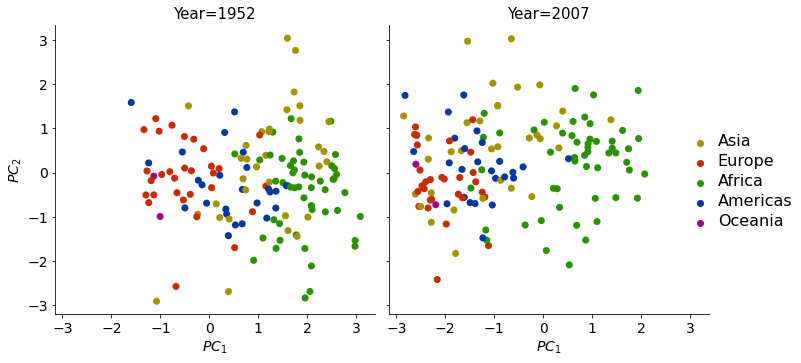

In [43]:
g=sns.relplot(data=df_pca.query('year==1952 or year==2007'),
              x='pca_1',
              y='pca_2',col='year',hue='continent',linewidth=0,marker='.',s=200,
              palette=values[0:5])
new_title = 'My title'
new_title = ''
g._legend.set_title(new_title)
plt.setp(g._legend.get_texts(), fontsize=16)



plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,2))

plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
g.set_axis_labels('$PC_1$','$PC_2$',size=14)
for ax, title in zip(g.axes.flat, ['Year=1952', 'Year=2007']):
    ax.set_title(title,size=15)


plt.savefig('scatter_pca_year.pdf',bbox_inches='tight')